import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns',100)
pd.set_option('display.width', 1000)




#reading data

df_crime= pd.read_csv("/Users/pallavi/PycharmProjects/BDAProject/RPD__Part_I_Crime_2011_to_Present.csv") #Reading the dataset in a dataframe using Pandas

#Here df is the dataframeset
#To see the info of the data frame 

#reading data
print("==================================================================")
feature_set = pd.read_csv("/Users/pallavi/Downloads/CleanCrime.csv") #Reading the dataset in a dataframe using Pandas
#Here df is the dataframeset
print(feature_set.info())

#To see the info of the data frame 

df_Personnel= pd.read_csv("/Users/pallavi/PycharmProjects/BDAProject/RPD_Police_Personnel.csv") #Reading the dataset in a dataframe using Pandas

df_Shooting_Victims=pd.read_csv("/Users/pallavi/PycharmProjects/BDAProject/Rochester_Shooting_Victims.csv")

df_homicides=pd.read_csv("/Users/pallavi/PycharmProjects/BDAProject/RochesterNY_Homicides.csv")

print(df_Personnel.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78416 entries, 0 to 78415
Data columns (total 48 columns):
X                                     77960 non-null float64
Y                                     77960 non-null float64
OBJECTID                              78416 non-null int64
Geocode_Address                       77960 non-null object
Geocode_Street                        78416 non-null object
OccurredFrom_Date_Year                78416 non-null int64
OccurredFrom_Date_Month               78416 non-null int64
OccurredFrom_Time                     78416 non-null int64
Shift                                 78416 non-null object
CleanedTime1                          78416 non-null object
Date                                  78416 non-null object
OccurredFrom_Timestamp                78416 non-null object
OccurredThrough_Date_Year             78416 non-null int64
OccurredThrough_Date_Month            78416 non-null int64
OccurredThrough_Time                  78416 non-null in

In [26]:
# print('==============================RPD-Personnel=====================================')
# df_Personnel.info()
# print('==============================RPD-Shooting-Victims==============================')
# df_Shooting_Victims.info()
# print('==============================RPD-Homicides=====================================')
# df_homicides.info()

In [2]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
count=0;
for index, row in feature_set.iterrows():
    if (pd.isnull(row['Geocode_Address'] )):
         location = geolocator.geocode(row['Geocode_Street'])
         if location is not None:
             latitude = location.latitude
             longitude= location.longitude
             feature_set.set_value(index,'X',latitude)
             feature_set.set_value(index,'Y',longitude)
             feature_set.set_value(index,'Geocode_Address',location)
             print('Street',row['Geocode_Street'])


/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


Street 222 ARBORWOOD LA  
Street 275 COMMERCE DR  
Street 1 BAUSCH & LOMB PL  
Street 1 BAUSCH & LOMB PL  
Street 1 BAUSCH & LOMB PL  
Street 70 G RAMONA PARK
Street 1290 A EMERSON ST
Street 708 B JOSEPH AVE
Street 0 UNKNOWN  
Street 2121 WHITNEY RD E  
Street 157 DAFFODIL TRAIL  
Street 120 A STENSON ST
Street 77 REAR PRIMROSE ST
Street 14 REAR WOODFORD ST
Street 44 B MANOR PKWY
Street 535 WINTON N ROAD
Street 140 C GREEN KNOLLS DR
Street 142 NORTON VILLAGE LA  
Street 905 C SOUTH AVE
Street 56 D DODGE ST
Street 56 D DODGE ST
Street 49 B BENNINGTON DR
Street 49 B BENNINGTON DR
Street 95 G MARIETTA ST
Street 46 B DODGE ST
Street 84 C DODGE ST
Street 480 WINTON N ROAD
Street 87 VAN ANDEN ST  
Street 98 B GREEN KNOLLS DR
Street 17 A MANOR PKWY
Street 42 D MANOR PKWY
Street 147 B ACKERMAN ST
Street 1 JAMES ST  
Street 58 C MANOR PKWY
Street 76 A DODGE ST
Street 23 A ALEXANDER ST
Street 31 B PLOVER ST
Street 755 WINTON N ROAD
Street 44 B WELD ST
Street 525 N WINTON ROAD
Street 663 WINTON N

In [3]:
print("Check the missing values after replaceing the longitude and latitude: ")
pd.isnull(feature_set).sum()


Check the missing values after replaceing the longitude and latitude: 


X                                     152
Y                                     152
OBJECTID                                0
Geocode_Address                       152
Geocode_Street                          0
OccurredFrom_Date_Year                  0
OccurredFrom_Date_Month                 0
OccurredFrom_Time                       0
Shift                                   0
CleanedTime1                            0
Date                                    0
OccurredFrom_Timestamp                  0
OccurredThrough_Date_Year               0
OccurredThrough_Date_Month              0
OccurredThrough_Time                    0
Shift.1                                 0
CleanedTime2                            0
Duration of Crime                       0
OccurredThrough_Timestamp               0
Week_Name                               0
Reported_Date_Year                      0
Reported_Date_Month                     0
Reported_Time                           0
ReportedTime                      

In [4]:
feature_set[feature_set.Geocode_Street!='UNKNOWN']
feature_set=feature_set.dropna(axis=0)
print(feature_set.shape)


# print("Check the missing values after dropping the longitude and latitude: ")
# pd.isnull(feature_range).sum()

(77952, 48)


In [7]:
print(display(feature_set))

,X,Y,OBJECTID,Geocode_Address,Geocode_Street,OccurredFrom_Date_Year,OccurredFrom_Date_Month,OccurredFrom_Time,Shift,CleanedTime1,Date,OccurredFrom_Timestamp,OccurredThrough_Date_Year,OccurredThrough_Date_Month,OccurredThrough_Time,Shift.1,CleanedTime2,Duration of Crime,OccurredThrough_Timestamp,Week_Name,Reported_Date_Year,Reported_Date_Month,Reported_Time,ReportedTime,Reported_Timestamp,Duration between report & occurred,Address_StreetFull,Address_City,Address_State,Patrol_Beat,Patrol_Section,Case_Status,Statute_Title,Statute_Section,Statute_Subsection,Statute_Degree,Statute_Class,Statute_Category,Statute_Text,Statute_Description,Statute_CrimeCategory,Statute_Attempted,Weapon_Description,Larceny_Type,Location_Type,Geo_Beat,Geo_Section,Geo_Section_Num
13,-77.641021,43.145561,14,"153 Wellington Ave, Rochester, NY, 14611",153 WELLINGTON AVE,2016,4,1000,MorningShift,10:00:00 AM,2016-04-26,2016-04-26T10:00:00.000Z,2016,5,1000,MorningShift,10:00:00 AM,0:00,2016-05-10T10:00:00.000Z,Tuesday,2016,6,1220,6:10:00 AM,2016-06-04T16:20:00.000Z,20:10,153 WELLINGTON AVE,Rochester,NY,223,Genesee,Cleared by Arrest - Adult,PL,155.25,,0,A,M,Larceny,Petit Larceny ...,6,Completed,* No Weapon Specified *,All Other Larcenies,Single Family Home,223.0,Genesee,3.0
14,-77.644837,43.166885,15,"103 Warner St, Rochester, NY, 14606",103 WARNER ST,2016,4,1817,NightShift,6:17:00 PM,2016-04-18,2016-04-18T18:17:00.000Z,2016,4,1817,NightShift,6:17:00 PM,0:00,2016-04-18T18:17:00.000Z,Monday,2016,4,1817,7:10:00 AM,2016-04-18T22:17:00.000Z,12:53,103 WARNER ST,ROCHESTER,NY,261,Lake,Cleared by Arrest - Adult,PL,160.05,,3,D,F,Robbery,Robbery 3rd ...,3,Completed,Not Reported,* No Larceny Type Specified *,Yard,261.0,Lake,1.0
15,-77.628075,43.138832,16,"57 Nellis Park, Rochester, NY, 14608",57 NELLIS PARK,2016,6,900,MorningShift,9:00:00 AM,2016-06-03,2016-06-03T09:00:00.000Z,2016,6,1200,MorningShift,12:00:00 PM,3:00,2016-06-03T12:00:00.000Z,Friday,2016,6,1220,8:10:00 AM,2016-06-03T16:20:00.000Z,20:10,57 NELLIS PARK,Rochester,NY,253,Genesee,Cleared by Arrest - Adult,PL,140.25,2,2,C,F,Burglary,Burglary 2nd: Illegal Entry: Dwelling ...,5,Completed,* No Weapon Specified *,* No Larceny Type Specified *,Single Family Home,253.0,Genesee,3.0
16,-77.629077,43.137793,17,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,2017,6,1630,NightShift,4:30:00 PM,2017-06-10,2017-06-10T16:30:00.000Z,2017,6,1644,NightShift,4:44:00 PM,0:14,2017-06-10T16:44:00.000Z,Saturday,2017,6,1644,9:10:00 AM,2017-06-10T20:44:00.000Z,16:26,849 JEFFERSON AVE,Rochester,NY,253,Genesee,Cleared by Arrest - Adult,PL,120.14,1,2,A,M,Aggravated Assault,Menacing 2nd: Weapon ...,4,Completed,Firearm,* No Larceny Type Specified *,Street,253.0,Genesee,3.0
17,-77.629077,43.137793,18,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,2016,7,2300,NightShift,11:00:00 PM,2016-07-01,2016-07-01T23:00:00.000Z,2016,7,2321,NightShift,11:21:00 PM,0:21,2016-07-01T23:21:00.000Z,Friday,2016,7,2300,10:10:00 AM,2016-07-02T03:00:00.000Z,10:49,849 JEFFERSON AVE,Rochester,NY,253,Genesee,Office,PL,160.10,1,2,C,F,Robbery,Robbery 2nd: Aided By Another ...,3,Completed,Not Reported,* No Larceny Type Specified *,Street,253.0,Genesee,3.0
18,-77.629077,43.137793,19,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,2011,6,621,MorningShift,6:21:00 AM,2011-06-21,2011-06-21T06:21:00.000Z,2011,6,1847,MorningShift,6:47:00 PM,12:26,2011-06-21T18:47:00.000Z,Tuesday,2011,6,1847,11:10:00 AM,2011-06-21T22:47:00.000Z,16:23,849 JEFFERSON AVE,Rochester,NY,253,Genesee,Exceptional Clearance,PL,160.15,4,1,B,F,Robbery,Robbery 1st: Displays What Appears To Be a Fir...,3,Completed,"Revolver, Derringer, or Single-shot Pistol",All Other Larcenies,Street,253.0,Genesee,3.0
19,-77.629077,43.137793,20,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,2013,4,2147,NightShift,9:47:00 PM,2013-04-05,2013-04-05T21:47:00.000Z,2013,4,2147,NightShift,9:47:00 PM,0:00,2013-04-05T21:47:00.000Z,Friday,2013,4,2157,12:10:00 PM,2013-04-06T01:57:00.000

None


In [5]:
# feature_set.Location_Type.astype("int", categories='Location_Type').cat.codes 
# print(feature_set.dtypes)
obj_feature_set = feature_set.select_dtypes(include=['object']).copy()
#print(obj_feature_set.head(2))

print(obj_feature_set["Location_Type"].value_counts())
# print(obj_feature_set["Week_Name"].value_counts())
# print(obj_feature_set["Weapon_Description"].value_counts())

cleanup_nums = {"Location_Type": {"Single Family Home": 1, 
                                 "Street": 2, 
                                "Multiple Dwelling": 3, 
                                "Other Outside Location":4,
                                "Parking Lot":5, 
                                "Grocery/Supermarket": 6, 
                                "Yard":7, 
                                "Hospital":8,
                                "Department/Discount Store":9,
                                "Other Residential":10,
                                "Garage/Shed":11,
                                "School":12,
                                "Other Retail Store":13,
                                "Gas Station":14,
                                "Other Building":15,
                                "Variety/Convenience Store":16,
                                "College":17,
                                "Yard":18,
                                "Restaurant":19,
                                "Bar":20,
                                "Other Public Access Building":21,
                                "Other Commercial Service Location":22,
                                "Other Business Office":23,
                                "Residential Facility":24,
                                "Drug Store":25,
                                "Parking Garage":26,
                                "* No Location Scene Specified *":27,
                                "Church":28,
                                "Park/Playground":29,
                                "Auto Shop":30,
                                "Financial Institution":31,
                                "Unknown":32,
                                "Public Transit Vehicle":33,
                                "Hotel/Motel":34,
                                "Construction Site":35,
                                "Clothing Store":36,
                                "Professional Office":37,
                                "Barber/Beauty Shop":38,
                                "Government Office":39,
                                "Factory/Mill/Plant":40,
                                "Transit Facility":41,
                                "Factory/Mill/Plant":42,
                                "Doctor's Office":43,
                                "Dry Cleaners/Laundry":44,
                                "Cemetery":45,
                                "Liquor Store":46,
                                "Buy/Sell/Trade Shop":47,
                                "Amusement Center":48,
                                "***":49,
                                "Field/Woods":50,
                                "Rental Storage Facility":51,
                                "Shopping Mall":52,
                                "Field/Woods":53,
                                "Rental Storage Facility":54,
                                "Shopping Mall":55,
                                "Not Reported":56,
                                "Lake/Waterway":57,
                                "Not Reported":58,
                                "Jewelry Store":58,
                                "Sporting Goods":58,
                                "Jail/Prison":59,
                                 "Auto Sales Lot":60}}
# feature_set['Location_Type'] =  feature_set['Location_Type'].astype('int64')

obj_feature_set.replace(cleanup_nums, inplace=True)
# print(obj_feature_set["Statute_Category"].value_counts())
# print(obj_feature_set["Statute_Class"].value_counts())
# print(obj_feature_set["Shift"].value_counts())

cleanup_attribute={"Statute_Category":     {"M": 1, "F": 2},
                    "Statute_Class":       {"A": 1, "B": 2, "C": 3, "D":4,"E":5},
                     "Shift":{"NightShift":1,"MorningShift":2,"AfternoonShift":3},
                     "Week_Name":{"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7},
                    "Weapon_Description":{  "* No Weapon Specified *":100,
                                            "Knife/Cutting Instrument":200,
                                            "Firearm":300,
                                            "Semiautomatic Handgun":400,
                                            "Personal Weapons":500,
                                            "Blunt Object":600,
                                            "Other Weapon":700,
                                            "Revolver, Derringer, or Single-shot Pistol":800,
                                            "Not Reported":900,
                                            "Shotgun":1000,
                                            "Unknown":1100,
                                            "Physical Force":1200,
                                            "Motor Vehicle":1300,
                                            "Imitation Firearm":1400,
                                            "Simulated Firearm":1500,
                                            "Semiautomatic Rifle":1600,
                                            "Fire/Incendiary Device":1700,
                                            "Single Shot, Pump Action, or Bolt Action Rifle":1800,
                                            "Fully Automatic Handgun or Submachine Gun":1900,
                                            "None/Not Applicable":2000,
                                            "Fully Automatic Rifle or Machine Gun":2100,
                                            "Explosives":2200,
                                            "Poison":2300,
                                            "Drug/Narcotics/Sleeping Pills":2400}
}

obj_feature_set.replace(cleanup_attribute, inplace=True)

obj_feature_set=obj_feature_set.drop(['Shift.1'],axis=1)
obj_feature_set=obj_feature_set.drop(['CleanedTime2'],axis=1)
obj_feature_set.head()





Single Family Home                   13602
Street                               12857
Multiple Dwelling                    10069
Other Outside Location                7941
Parking Lot                           6848
Grocery/Supermarket                   3713
Yard                                  2796
Hospital                              1428
Department/Discount Store             1363
Other Residential                     1283
Garage/Shed                           1255
School                                1138
Other Retail Store                    1012
Gas Station                            971
Other Building                         934
Variety/Convenience Store              922
College                                915
Restaurant                             808
Bar                                    735
Other Public Access Building           636
Other Commercial Service Location      595
Other Business Office                  554
Drug Store                             517
Residential

,Geocode_Address,Geocode_Street,Shift,CleanedTime1,Date,OccurredFrom_Timestamp,Duration of Crime,OccurredThrough_Timestamp,Week_Name,ReportedTime,Reported_Timestamp,Duration between report & occurred,Address_StreetFull,Address_City,Address_State,Patrol_Beat,Patrol_Section,Case_Status,Statute_Title,Statute_Subsection,Statute_Class,Statute_Category,Statute_Text,Statute_Description,Statute_Attempted,Weapon_Description,Larceny_Type,Location_Type,Geo_Section
0,NaN,* Address Not Specified *,2,8:00:00 AM,2018-02-14,2018-02-14T08:00:00.000Z,5:10,2018-03-14T13:10:00.000Z,3,5:10:00 PM,2018-03-14T17:10:00.000Z,4:00,* Address Not Specified *,* Address Not Specified *,***,***,***,Field,PL,7,5,2,Larceny,Grand Larceny 4th: Firearms/Rifles/Shotguns ...,Completed,100,All Other Larcenies,32,NaN
1,NaN,* Address Not Specified *,3,12:00:00 PM,2018-02-27,2018-02-27T12:00:00.000Z,0:30,2018-02-27T12:30:00.000Z,2,6:10:00 PM,2018-03-08T15:26:00.000Z,5:40,* Address Not Specified *,* Address Not Specified *,***,***,***,Field,PL,1,4,2,Larceny,Grand Larceny 3rd: Property Value Exceeds $300...,Completed,100,All Other Larcenies,22,NaN
2,NaN,* Address Not Specified *,3,3:00:00 PM,2018-02-20,2018-02-20T15:00:00.000Z,##############################################...,2018-02-21T08:00:00.000Z,2,7:10:00 PM,2018-02-21T15:19:00.000Z,11:10,* Address Not Specified *,* Address Not Specified *,***,***,***,Office,PL,,4,2,Larceny,Grand Larceny 3rd ...,Completed,100,All Other Larcenies,22,NaN
3,NaN,* Address Not Specified *,2,9:41:00 AM,2018-02-06,2018-02-06T09:41:00.000Z,0:00,2018-02-06T09:41:00.000Z,2,8:10:00 PM,2018-02-06T14:41:00.000Z,10:29,* Address Not Specified *,* Address Not Specified *,***,***,***,Office,PL,2,4,2,Aggravated Assault,Assault 2nd: Intent To Cause Physical Injury w...,Completed,200,* No Larceny Type Specified *,5,NaN
4,NaN,* Address Not Specified *,3,12:00:00 PM,2018-01-29,2018-01-29T12:00:00.000Z,0:00,2018-01-31T12:00:00.000Z,1,9:10:00 PM,2018-02-05T23:37:00.000Z,9:10,* Address Not Specified *,* Address Not Specified *,***,***,***,Office,PL,,1,1,Larceny,Petit Larceny ...,Completed,100,All Other Larcenies,31,NaN


In [6]:
# plt.figure(figsize = (20, 6))
# ax = sns.barplot(x='Location_Type', y='Weapon_Description', data=obj_feature_set)
# plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
# plt.xticks(rotation=45)
# plt.show()

obj_feature_set.dtypes

Geocode_Address                       object
Geocode_Street                        object
Shift                                  int64
CleanedTime1                          object
Date                                  object
OccurredFrom_Timestamp                object
Duration of Crime                     object
OccurredThrough_Timestamp             object
Week_Name                              int64
ReportedTime                          object
Reported_Timestamp                    object
Duration between report & occurred    object
Address_StreetFull                    object
Address_City                          object
Address_State                         object
Patrol_Beat                           object
Patrol_Section                        object
Case_Status                           object
Statute_Title                         object
Statute_Subsection                    object
Statute_Class                          int64
Statute_Category                       int64
Statute_Te

/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


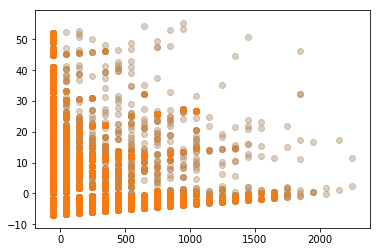

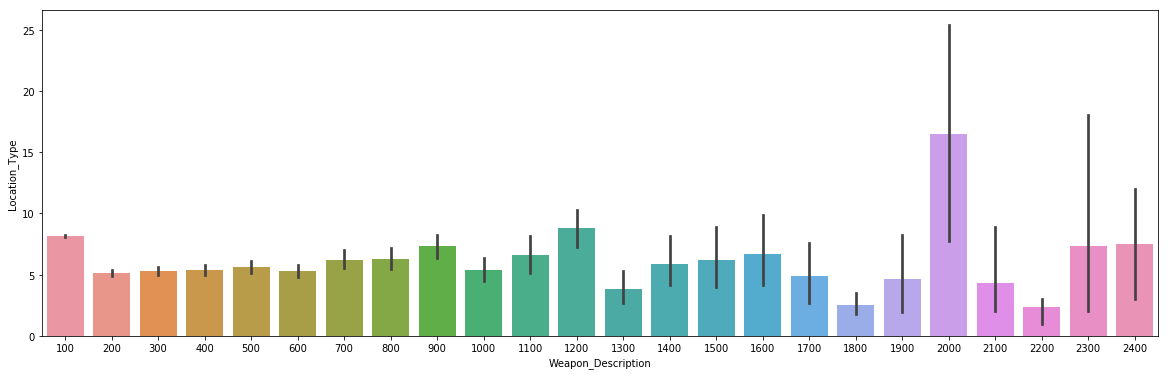

In [229]:
plt.figure(figsize = (20, 6))
ax = sns.barplot(x='Weapon_Description', y='Location_Type', data=obj_feature_set)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.show()

/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


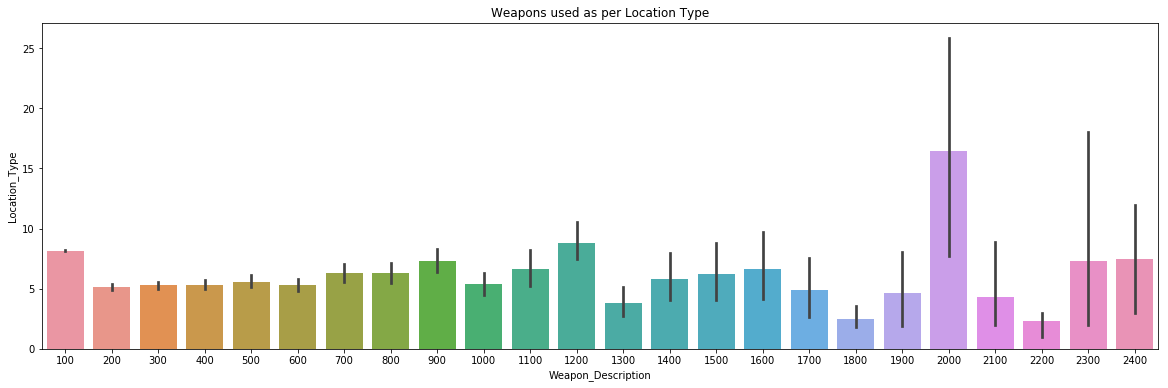

In [8]:
import seaborn as sns
plt.figure(figsize = (20, 6))
ax = sns.barplot(x='Weapon_Description', y='Location_Type', data=obj_feature_set)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.title('Weapons used as per Location Type')
plt.show()

In [9]:

print(df_Personnel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 16 columns):
OBJECTID           888 non-null int64
Residency          888 non-null object
Full_Name          888 non-null object
Sex                888 non-null object
Race               888 non-null object
Ethnicity          865 non-null object
Age                888 non-null int64
Hire_Date          888 non-null object
Age_At_Hire        888 non-null int64
Years_On_Job       888 non-null int64
Employee_Status    888 non-null object
Employees_Type     888 non-null object
Rank               888 non-null object
Rank_Start_Date    888 non-null object
Shape__Area        888 non-null float64
Shape__Length      888 non-null float64
dtypes: float64(2), int64(4), object(10)
memory usage: 111.1+ KB
None


In [ ]:
# feature_set.Location_Type.astype("int", categories='Location_Type').cat.codes 
# print(feature_set.dtypes)
obj_df_Personnel= df_Personnel.select_dtypes(include=['object']).copy()